<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Multilayer Perceptron Models with Keras</h2>

## Task 1: Project Overview and Import Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


## Task 2: Load the Reuters Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000, test_split = 0.2)

In [7]:
print(len(x_train), 'training examples')
print(len(x_test), 'test examples')

8982 training examples
2246 test examples


In [8]:
num_class = np.max(y_train) + 1
print(num_class, 'classes')

46 classes


## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [10]:
tokenizer = Tokenizer(num_words = 10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode = 'binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode = 'binary')
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [12]:
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## Task 4: Build Multilayer Perceptron Model

In [13]:
model = Sequential([
    Dense(512, input_shape = (10000,)),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_class),
    Activation('softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## Task 5: Train Model

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1, mode = 'min')

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                   epochs = 100, 
                   batch_size = 32,
                   validation_split = 0.1,
                   callbacks = [es])

Train on 8083 samples, validate on 899 samples
Epoch 1/100
8083/8083 [==============================] - 18s 2ms/sample - loss: 1.2904 - accuracy: 0.7182 - val_loss: 0.9363 - val_accuracy: 0.7964
Epoch 2/100
8083/8083 [==============================] - 8s 1ms/sample - loss: 0.5046 - accuracy: 0.8910 - val_loss: 0.8463 - val_accuracy: 0.8142
Epoch 3/100
8083/8083 [==============================] - 10s 1ms/sample - loss: 0.2908 - accuracy: 0.9336 - val_loss: 0.9077 - val_accuracy: 0.8120
Epoch 4/100
8083/8083 [==============================] - 9s 1ms/sample - loss: 0.2242 - accuracy: 0.9484 - val_loss: 0.9566 - val_accuracy: 0.8098
Epoch 5/100
8083/8083 [==============================] - 10s 1ms/sample - loss: 0.1937 - accuracy: 0.9513 - val_loss: 0.9778 - val_accuracy: 0.8042
Epoch 00005: early stopping


## Task 6: Evaluate Model on Test Data

In [20]:
model.evaluate(x_test, y_test, batch_size = 32, verbose = 1)

2246/2246 [==============================] - 1s 394us/sample - loss: 0.9736 - accuracy: 0.8032


[0.97355909423964, 0.8032057]

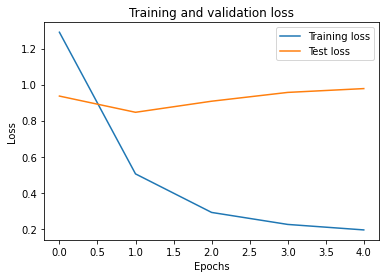

In [22]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

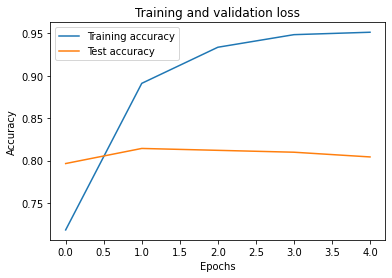

In [23]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()